# Amélioration des performances du modèle CNN


## Réalisé par : Ahmed Mrabet

Dans ce notebook, nous allons essayé d'améliorer les performances du modèle CNN qu'on a realiser en utilisant différentes techniques.

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Nouveau modèle CNN

### Step 1: Dataset

In [ ]:
img_height = 32
img_width = 32
batch_size = 64

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4833 files belonging to 3 classes.
Found 690 files belonging to 3 classes.
Found 1379 files belonging to 3 classes.


#### Visualisation des données

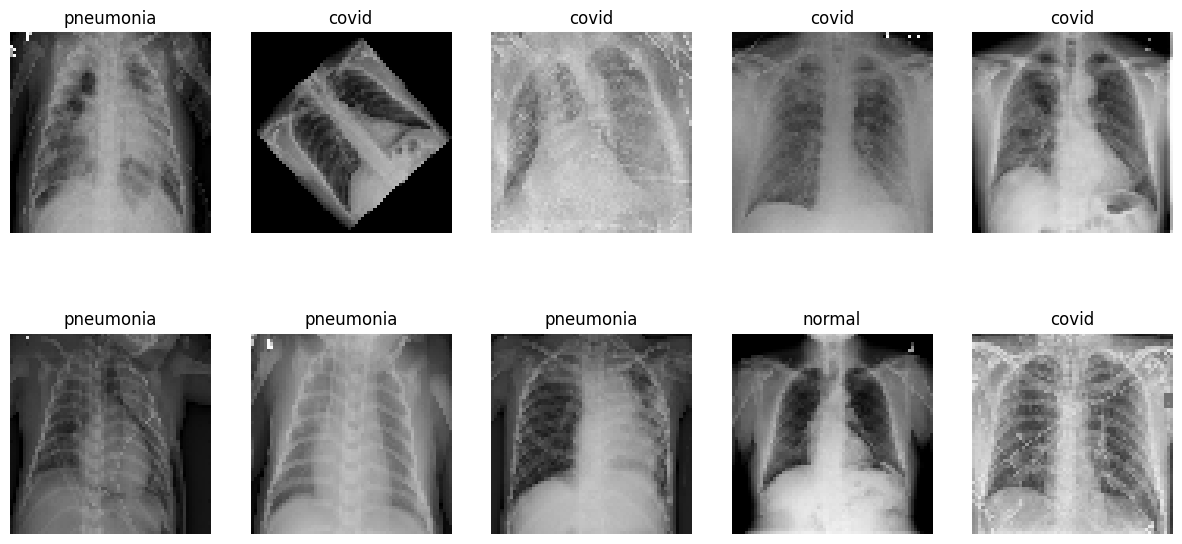

In [17]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [18]:
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    return image, label

train_dataset = train_dataset.map(convert_to_grayscale)
validation_dataset = validation_dataset.map(convert_to_grayscale)
test_dataset = test_dataset.map(convert_to_grayscale)

### Data Augmentation

In [19]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomBrightness(0.1)
# ])

# train_dataset = train_dataset.map(lambda image, label: (data_augmentation(image, training=True), label))

### Step 2: Création du modèle

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.regularizers import l2


In [21]:
model = Sequential([    
    Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(84, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(3, activation='softmax')  # 3 classes: Normal, Pneumonia, COVID
])

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 3: Paramétrage du modèle

In [22]:
model.compile(
  optimizer='adam', 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

### Step 4: Training du modèle

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_result = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.5076 - loss: 3.5951 - val_accuracy: 0.8006 - val_loss: 1.0141
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 38s 284ms/step - accuracy: 0.8181 - loss: 0.9375 - val_accuracy: 0.8753 - val_loss: 0.6803
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.8559 - loss: 0.7014 - val_accuracy: 0.8934 - val_loss: 0.5410
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - accuracy: 0.8766 - loss: 0.5957 - val_accuracy: 0.8687 - val_loss: 0.5423
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - accuracy: 0.8779 - loss: 0.5412 - val_accuracy: 0.8963 - val_loss: 0.4662
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 325ms/step - accuracy: 0.8911 - loss: 0.5104 - val_accuracy: 0.8891 - val_loss: 0.4781
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.8961 - loss: 0.4605 - val_accuracy: 0.9101 - val_loss: 0.3974
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.8974 - loss: 0.4430 - val_accuracy: 0.915

### Step 5: Test

In [24]:
model.evaluate(test_dataset, verbose=2)

11/11 - 3s - 261ms/step - accuracy: 0.9478 - loss: 0.3161


[0.31611254811286926, 0.947826087474823]

### Courbes de perte et d'exactitude

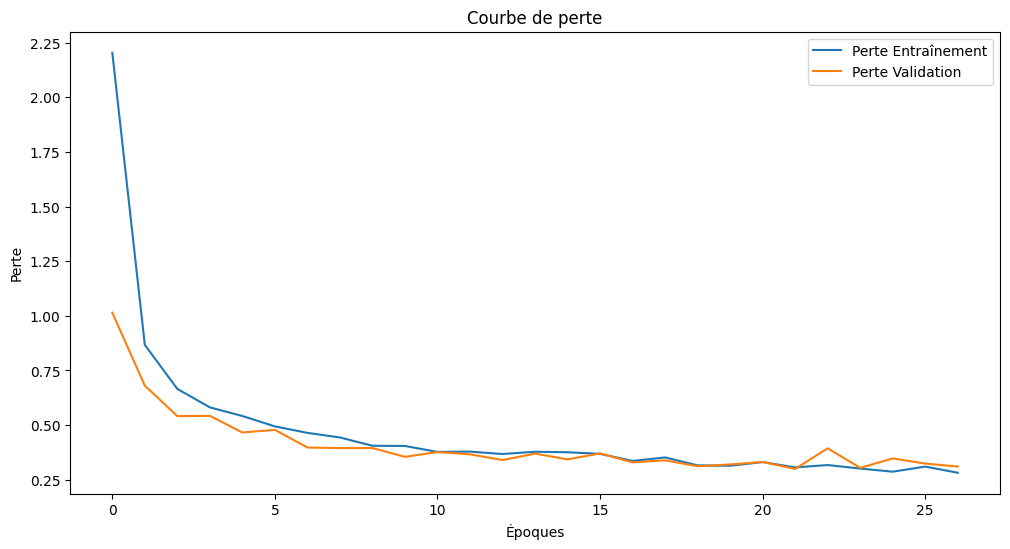

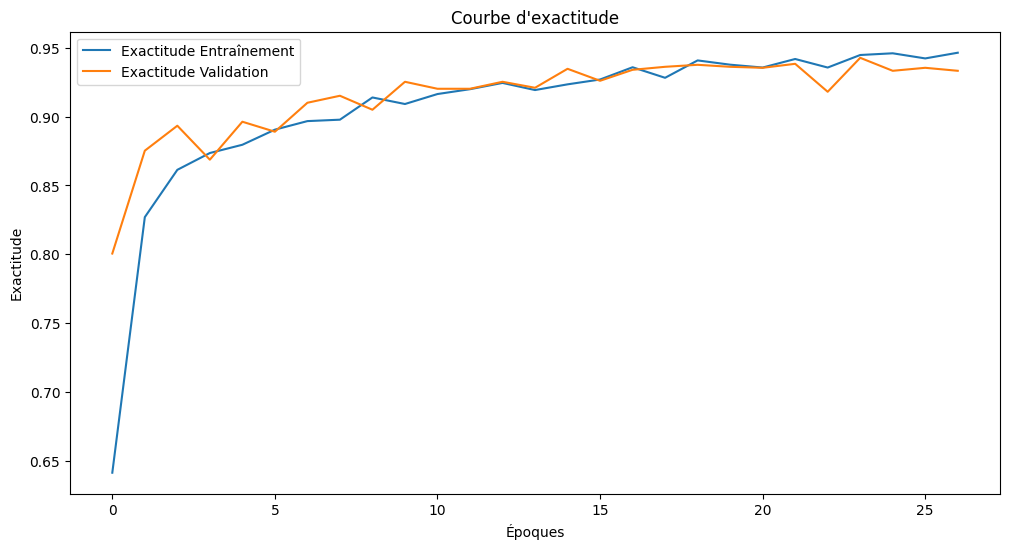

In [25]:
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.plot(train_result.history['loss'], label='Perte Entraînement')
plt.plot(train_result.history['val_loss'], label='Perte Validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Tracer la courbe de précision
plt.figure(figsize=(12, 6))
plt.plot(train_result.history['accuracy'], label='Exactitude Entraînement')
plt.plot(train_result.history['val_accuracy'], label='Exactitude Validation')
plt.title('Courbe d\'exactitude')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

### Matrice de confusion

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step


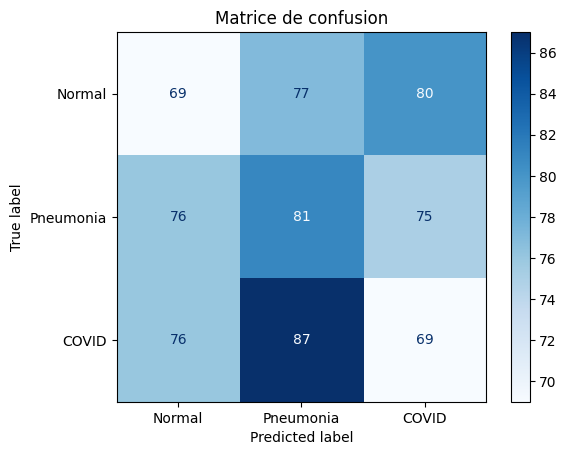

In [27]:
# Prédictions sur le jeu de test
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Récupération des vraies étiquettes
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia", "COVID"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

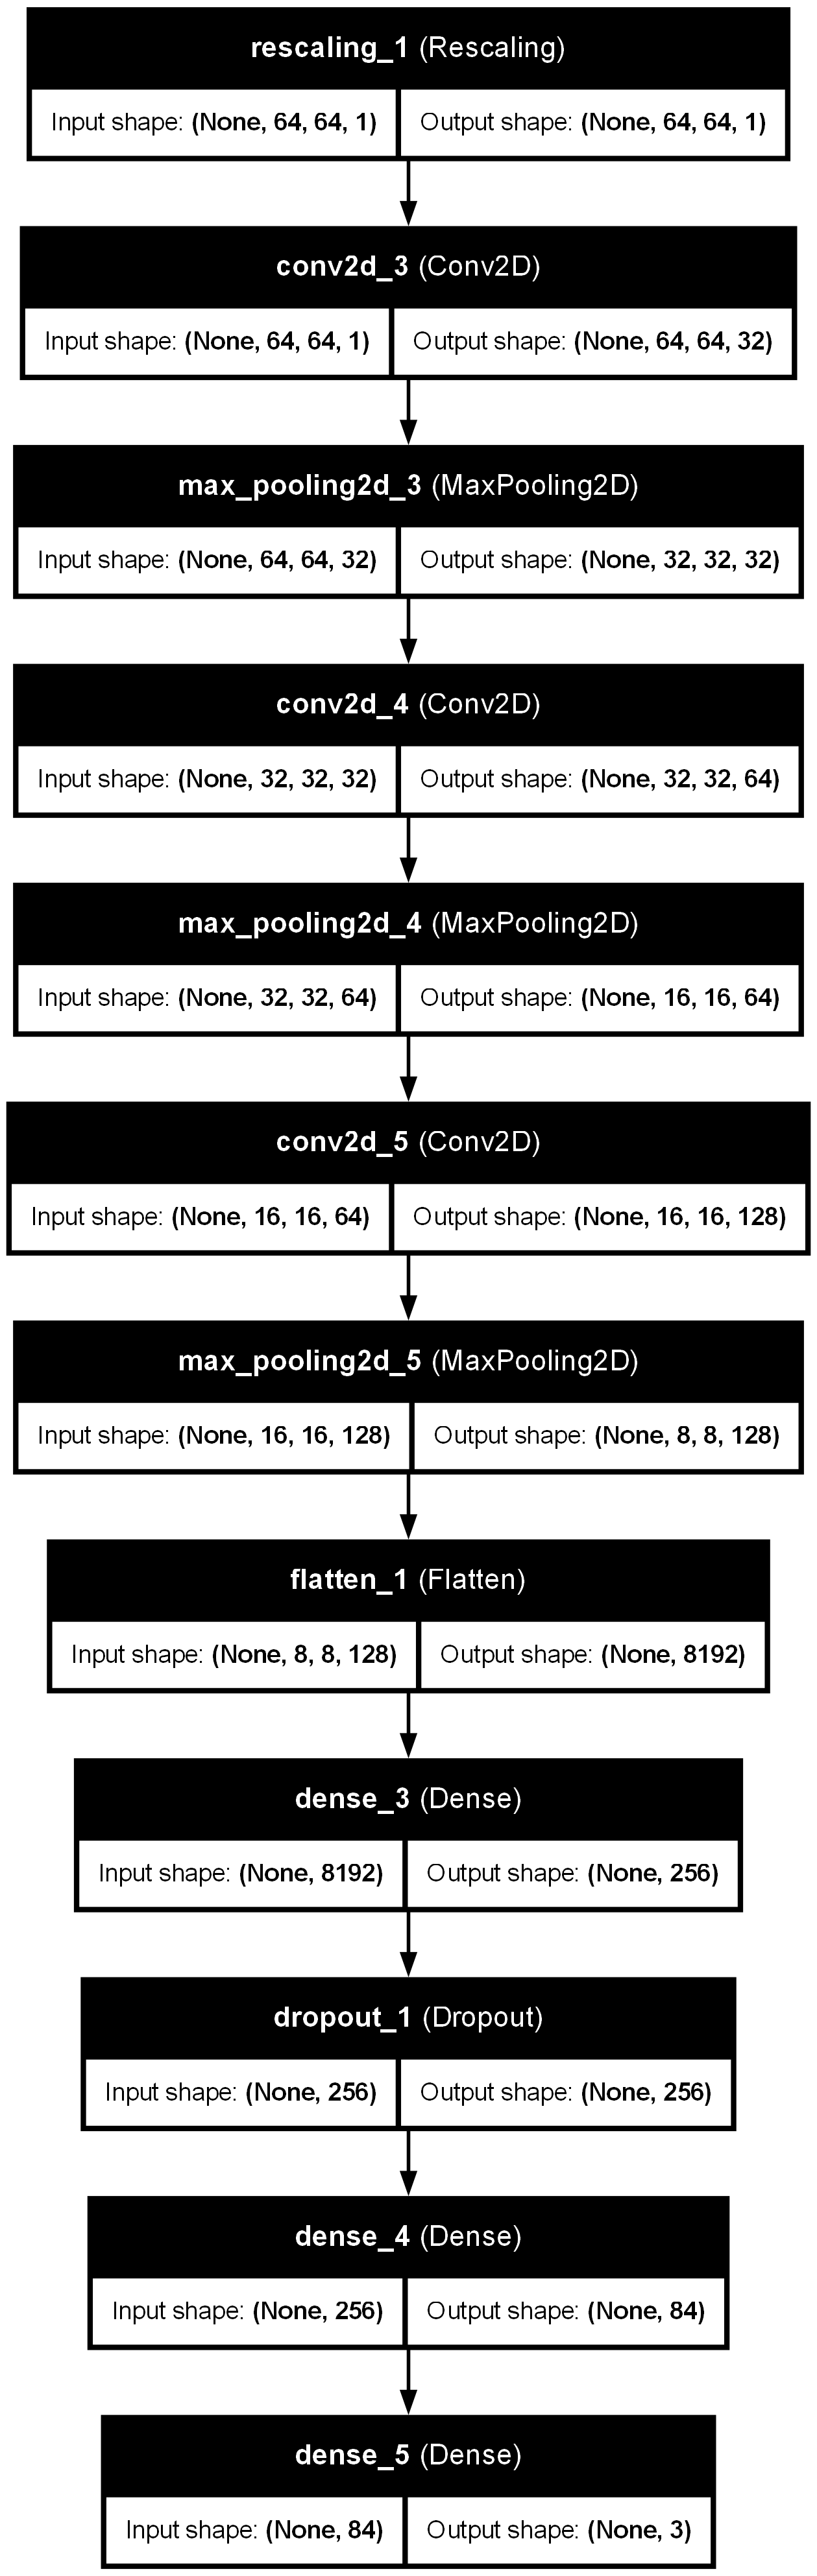

In [29]:
from tensorflow.keras.utils import plot_model

# Générer une représentation graphique
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)